# Chinook music store
The chinook record store Database is like a digital music shops's blueprint,packed with details about artists,songs,albums,customers and purchases. It's a compact version of itunes,neatly organizing everything into eleven tables.It's a valuable resources for music lovers and data fans,offering insight into how a music store operates.
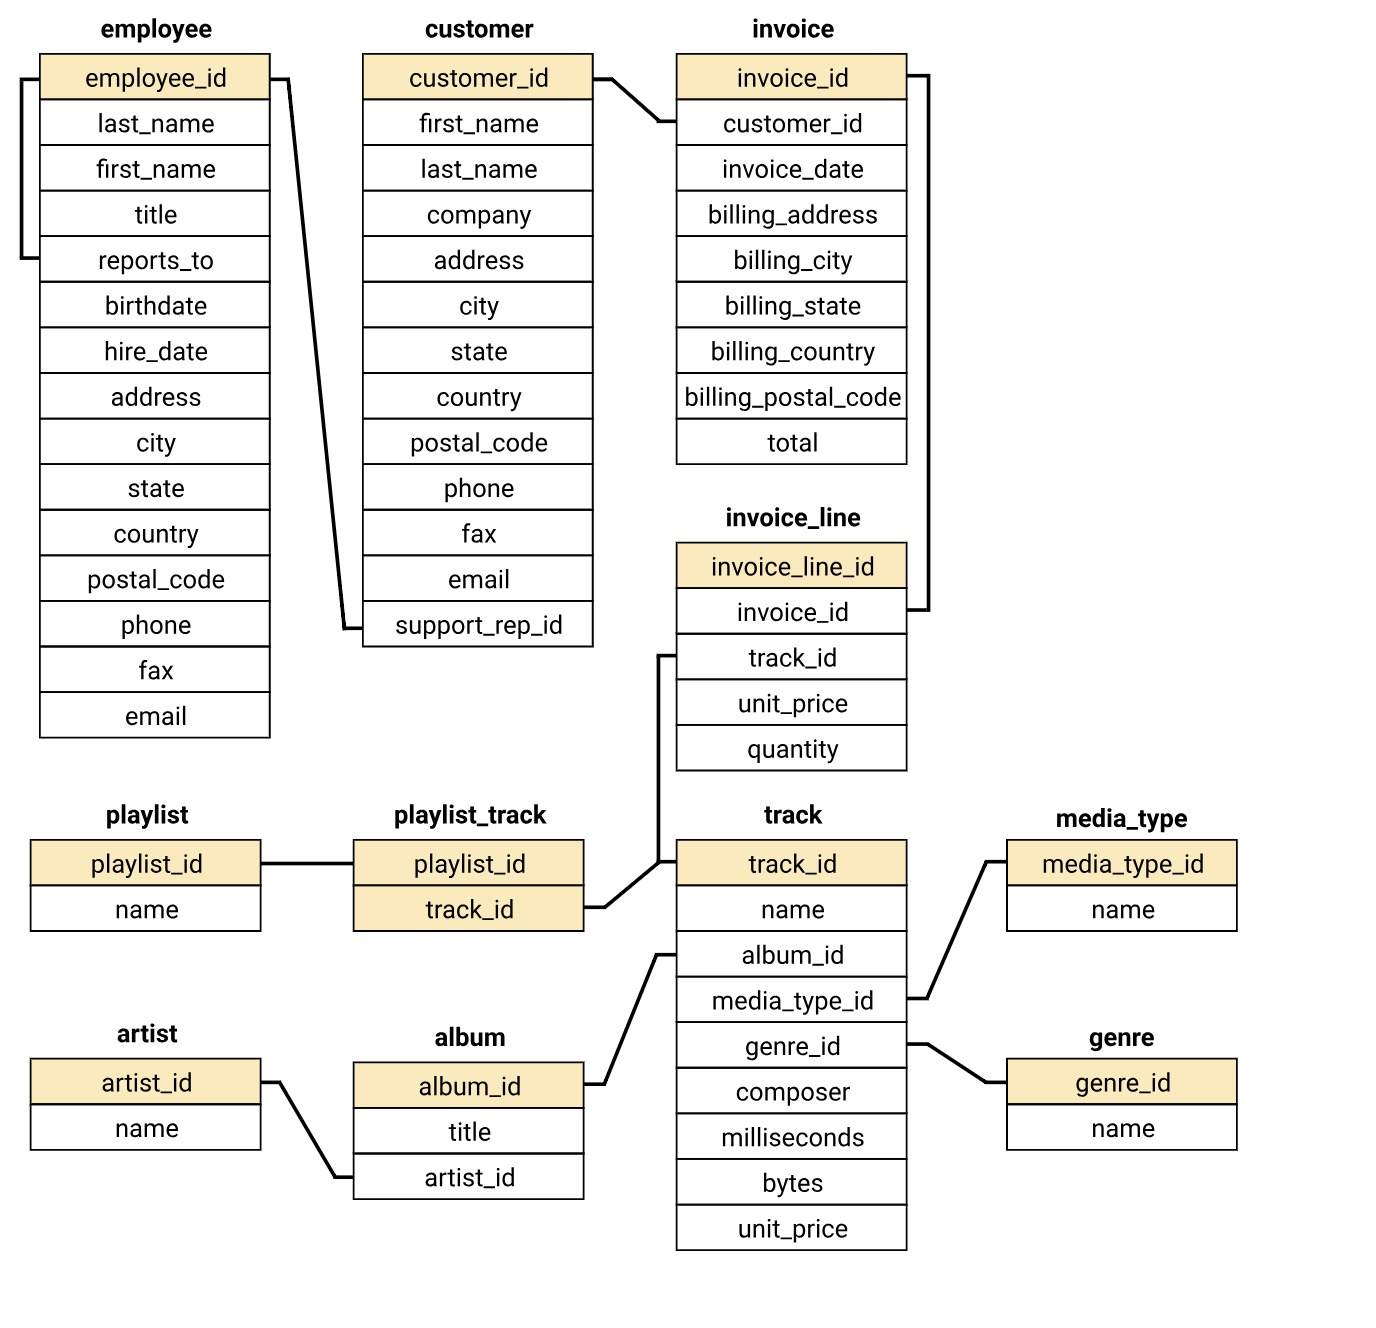

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = "chinook.db"
def run_query(q):
    with sql.connect(db) as conn:
        return pd.read_sql_query(q,conn)

# Genre analysis for album selection: Identifying Top-selling Genre in the USA
chinook record store wants to select three albums to add from a list of four new artists,each belonging to different Genres. The Genres include Hip-Hop,Punk,Pop and Blues.The record label focuses on US artists and plans to advertise in the USA.
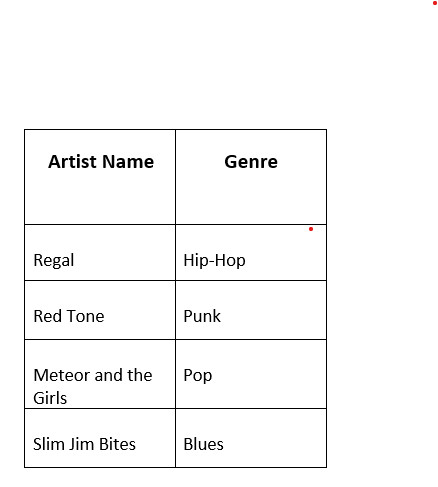

To decide which albums to choose, we need to find out which Genres are most popular in the USA. We'll do this by querying the database to see which Genres sell the most tracks in the USA. Based on this information. We'll make recommendations fot the three artists whose albums chinook should purchase.

In [3]:
q = '''

WITH usa_tracks AS
    (SELECT t.genre_id AS genre_id, il.invoice_line_id
     FROM track AS t
     INNER JOIN invoice_line AS il ON il.track_id = t.track_id
     INNER JOIN invoice AS i ON i.invoice_id = il.invoice_id
     WHERE i.billing_country = 'USA'
    )
SELECT g.name AS genre_name,
       COUNT(usa.genre_id) AS num_purchases,
       ROUND((CAST(COUNT(usa.genre_id) AS float) / (SELECT COUNT(genre_id)
                                                     FROM usa_tracks)) * 100, 2) AS percentage_sold
FROM usa_tracks AS usa
INNER JOIN genre AS g ON g.genre_id = usa.genre_id
GROUP BY g.name
ORDER BY num_purchases DESC;'''


df = run_query(q)
df

,genre_name,num_purchases,percentage_sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Latin,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


C:\Users\hassa\AppData\Local\Temp\ipykernel_8284\4023081543.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df['genre_name'], fontsize=10.5, color='#B0151B')


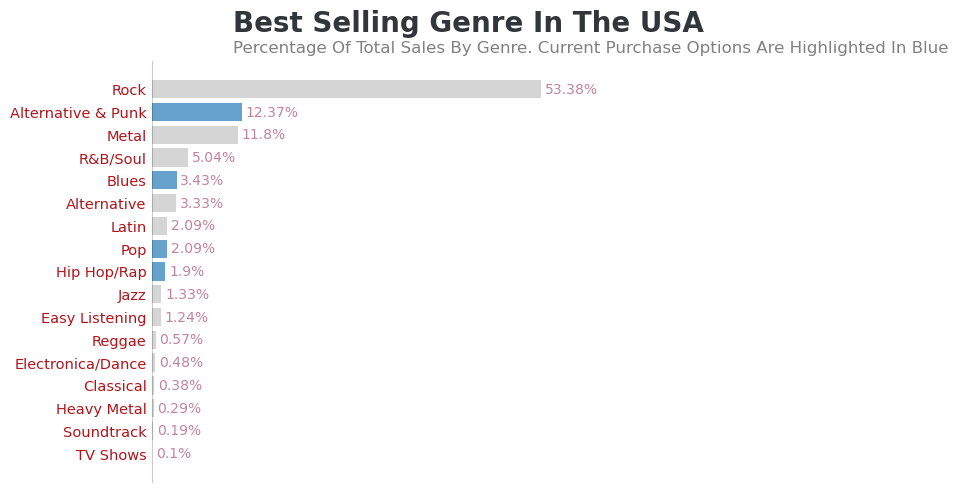

In [4]:
import matplotlib.pyplot as plt

df = df.sort_values(by='percentage_sold')

album_options = ['Hip Hop/Rap', 'Alternative & Punk', 'Blues', 'Pop']

cmap = df['genre_name'].apply(lambda x: '#0064AB' if x in album_options else '#BABABA')

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(df['genre_name'], df["percentage_sold"], height=0.8, color=cmap, alpha=0.6)

for bar, percentage in zip(bars, df["percentage_sold"]):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage}%', va='center', ha='left',
            fontsize=10, color='#C28499')  # Change text color to grey

ax.set_yticklabels(df['genre_name'], fontsize=10.5, color='#B0151B')

ax.set_xticks([])

plt.text(0.2, 1.07, 'Best Selling Genre In The USA', fontsize=20, fontweight='bold', color='#31363b',
         transform=plt.gca().transAxes)
plt.text(0.2, 1.02, 'Percentage Of Total Sales By Genre. Current Purchase Options Are Highlighted In Blue',
         fontsize=12, color='grey', transform=plt.gca().transAxes)  # Change text color to grey

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['left'].set_color('#000000')
ax.spines['left'].set_alpha(0.2)

ax.tick_params(axis='y', which='both', length=0)

plt.tight_layout()
plt.show()

# Results

The bar chart presents a distribution of music genre sales percentages in the USA, with the genre "Rock" dominating at 53.38%. Notably, "Alternative & Punk" and "Metal" also have a significant share, with 12.37% and 11.8% respectively. Genres such as "R&B/Soul" and "Blues" follow, holding smaller portions of the market at 5.04% and 3.43%. The genres "Alternative," "Latin," and "Pop" each make up just over 2% of sales. "Hip Hop/Rap" is close behind at 1.9%, and "Jazz" and "Easy Listening" genres contribute around 1% each. Lower down the chart, "Reggae," "Electronica/Dance," "Classical," "Heavy Metal," and "Soundtrack" have more modest figures, all under 1%, with "TV Shows" barely making the list at 0.1%. The chart highlights "Rock," "Alternative & Punk," and "Metal" in blue to signify these are the genres with current purchase options available.

# Employee sales performance Analysis

# The situation 
After an initial puchase,each chinook customer is assigned to sales support agent. The company aksed us to analyze purchases for customers belonging to each sales agent.They want to know if some agents are performing better or worse than others.
# Analysis
To answer this question, we need to extract the names of the sales executives,their hire dates, the number of accounts they handle, and the total purchases made by these accounts. We will also compute the avergae sales for each account that the sales executives manage.

In [5]:
q="""
      With t1 as (SELECT em.first_name ||''|| em.last_name AS sales_rep_name,
                         em.hire_date,
                         COUNT(cu.customer_id) AS num_invoices,
                         CAST(SUM(iv.total)AS Integer) AS total_sales
                         FROM employee em
                         JOIN customer cu
                           ON em.employee_id = cu.support_rep_id
                         JOIN invoice iv
                           ON iv.customer_id = cu.customer_id
                           GROUP BY 1
                           ORDER BY 4 DESC)
     SELECT *,
             Round(CAST(total_sales AS Float) / num_invoices,2)
               AS sales_per_customer
        From t1;
        """
df = run_query(q)
df

,sales_rep_name,hire_date,num_invoices,total_sales,sales_per_customer
0,JanePeacock,2017-04-01 00:00:00,212,1731,8.17
1,MargaretPark,2017-05-03 00:00:00,214,1584,7.40
2,SteveJohnson,2017-10-17 00:00:00,188,1393,7.41


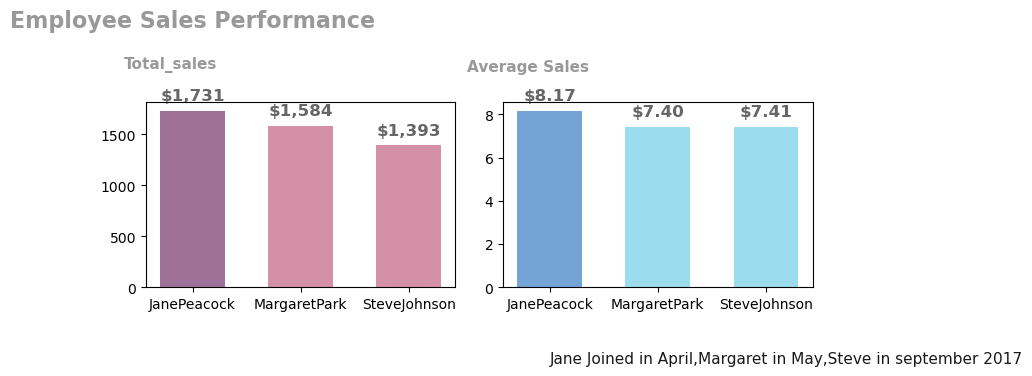

In [6]:
import matplotlib.pyplot as plt
#Data
sales_rep_name = df["sales_rep_name"]. values
total_sales = df["total_sales"].values
sales_per_customer = df["sales_per_customer"].values

#create subplots
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,8))

#total sales chart
axes[0].bar(sales_rep_name,total_sales, color = "#D490A7",width=0.6)
axes[0].bar(sales_rep_name[0],total_sales[0],color = "#262B7A", alpha=0.3, width=0.6)
#total sales chart label
axes[0].text(x=-0.2, y=2150,s="Total_sales",size=11,fontweight="bold",alpha=0.4,ha="center") 

#total sales annotations
for sales,index in zip(total_sales,range(3)):
    axes[0].text(x=index,y=sales+100,s='${:,}'.format(sales),ha='center',fontweight='bold',alpha=0.6,size=12)

#main chart title
axes[0].text(x=-0, y=2550,s="Employee Sales Performance",size=16,fontweight="bold",alpha=0.4,ha="center") 

#average sales chart
axes[1].bar(sales_rep_name,sales_per_customer, color = "#9BDCED",width=0.6)
axes[1].bar(sales_rep_name[0],sales_per_customer[0],color = "#1D22A3", alpha=0.3, width=0.6)
#average sales chart label
axes[1].text(x=-0.2, y=10,s="Average Sales",size=11,fontweight="bold",alpha=0.4,ha="center") 

#average sales annotations 
for sales,index in zip(sales_per_customer,range(3)):
    axes[1].text(x=index,y=sales+0.5,s= '${:,.2f}'.format(sales),ha='center',fontweight='bold',alpha=0.6,size=12)

#footnote
axes[1].text(x=-0, y=-3.5,s="Jane Joined in April,Margaret in May,Steve in september 2017",size=11,alpha=0.9)
 
#common attributes to both charts 
for x in axes:
    
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDD')
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_color('#DDD')
    ax.spines['bottom'].set_alpha(0.5)
    
    ax.tick_params(left=False,bottom=False,labelsize=10,labelcolor='grey')
    ax.grid(axis='y',linestyle='--',alpha=0.3)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()
    
    

# Results

In the bar charts compare the sales figures of three employees: Jane Peacock, Margaret Park, and Steve Johnson. Jane Peacock is at the forefront with total sales of $1,731 and the  highest  average  sales  per  transaction  at $8.17. Margaret Park's total sales are $1,584, and Steve Johnson's are $1,393, with their average sales closely matched at $7.40 and $7.41, respectively. Their start dates, mentioned in the note, range from April to September 2017.
 

# Sales by country

# The situation 
Chinook wants to understand how sales are distributed across different countries. The company intends to identify countries with growth potential and may even run advertising campaigns in these countries. 

# Analysis
To answer this question,we will write a query that collates data on purcahses from different countries. For each country, We will include that total number of customers,total sales value,average sales per customer,and the average order value.Where a country has only one customer. We will collect it into an "other" group:

In [7]:
q = """-- Collate the number of customers in each country
WITH tl AS (
    SELECT 
        country,
        COUNT(customer_id) AS num_customers
    FROM 
        customer
    GROUP BY 
        country
),

-- Collate the total sales in each country
t2 AS (
    SELECT 
        cu.country,
        ROUND(SUM(iv.total), 2) AS total_sales,
        COUNT(iv.invoice_id) AS num_sales
    FROM 
        customer cu
    JOIN invoice iv
         ON cu.customer_id = iv.customer_id
    GROUP BY 
        cu.country
),

-- Group countries with only one customer as 'others'
t3 AS (
    SELECT 
        CASE 
            WHEN tl.num_customers = 1 THEN 'others'
            ELSE tl.country 
        END AS countries,
        SUM(tl.num_customers) AS num_customers,
        SUM(t2.total_sales) AS total_sales,
        SUM(t2.num_sales) AS num_sales
    FROM 
        tl
    JOIN 
        t2 ON tl.country = t2.country
    GROUP BY 
        1
),
-- Calculate relevant sales metrics
t4 AS (
    SELECT 
        countries, 
        num_customers,
        total_sales, 
        ROUND(total_sales / num_sales, 2) AS avg_order_value,
        ROUND(total_sales / num_customers, 2) AS sales_per_customer,
        CASE 
            WHEN countries = 'others' THEN 1
            ELSE 0  
        END AS sort
    FROM 
        t3
)

SELECT 
    countries, 
    num_customers,
    total_sales, 
    avg_order_value,
    sales_per_customer
FROM 
    t4
ORDER BY 
    sort, num_customers DESC;

"""
df = run_query(q)
df

,countries,num_customers,total_sales,avg_order_value,sales_per_customer
0,USA,13,1040.49,7.94,80.04
1,Canada,8,535.59,7.05,66.95
2,Brazil,5,427.68,7.01,85.54
3,France,5,389.07,7.78,77.81
4,Germany,4,334.62,8.16,83.66
5,United Kingdom,3,245.52,8.77,81.84
6,Czech Republic,2,273.24,9.11,136.62
7,India,2,183.15,8.72,91.58
8,Portugal,2,185.13,6.38,92.57
9,others,15,1094.94,7.45,73.00


In [8]:
avg_cust_purchase = df.sales_per_customer.mean()
print(avg_cust_purchase)
df['pcent_customers'] = round(100*df.num_customers/df.num_customers.sum(),1)
df['pcent_sales'] = round(100*df.total_sales/df.total_sales.sum(),1)
df['cust_purchases_diff'] = round(100*(df.sales_per_customer - avg_cust_purchase)/avg_cust_purchase , 2)

86.96099999999998


In [9]:
df

,countries,num_customers,total_sales,avg_order_value,sales_per_customer,pcent_customers,pcent_sales,cust_purchases_diff
0,USA,13,1040.49,7.94,80.04,22.0,22.1,-7.96
1,Canada,8,535.59,7.05,66.95,13.6,11.4,-23.01
2,Brazil,5,427.68,7.01,85.54,8.5,9.1,-1.63
3,France,5,389.07,7.78,77.81,8.5,8.3,-10.52
4,Germany,4,334.62,8.16,83.66,6.8,7.1,-3.80
5,United Kingdom,3,245.52,8.77,81.84,5.1,5.2,-5.89
6,Czech Republic,2,273.24,9.11,136.62,3.4,5.8,57.10
7,India,2,183.15,8.72,91.58,3.4,3.9,5.31
8,Portugal,2,185.13,6.38,92.57,3.4,3.9,6.45
9,others,15,1094.94,7.45,73.00,25.4,23.2,-16.05


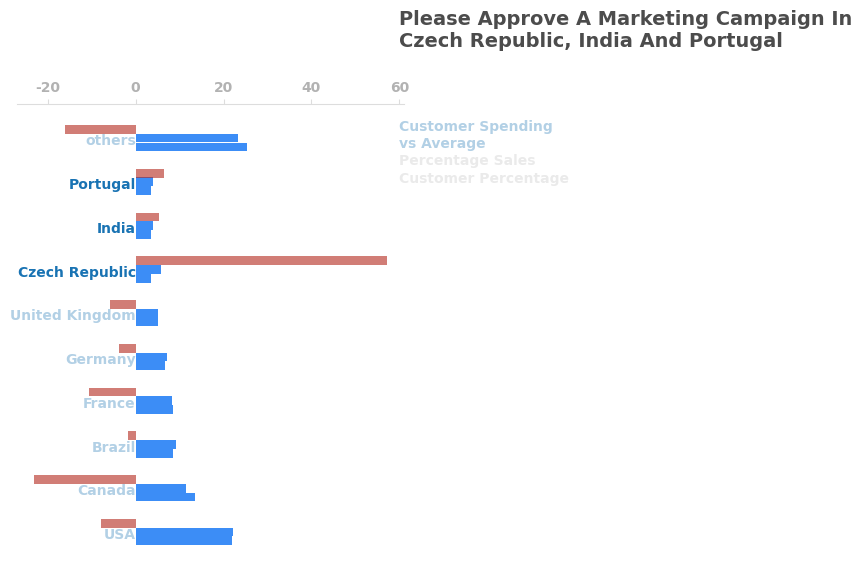

In [10]:
y_labs = df.countries.values
y_axes = np.arange(df.countries.size)

fig = plt.figure(figsize = (5,6))
plt.barh(y_axes - 0.3 , df.pcent_customers , height = 0.2 , color = '#3C8DF6')
plt.barh(y_axes - 0.1 , df.pcent_sales , height = 0.2 , color = '#3C8DF6')
plt.barh(y_axes + 0.1 , df.cust_purchases_diff , height = 0.2 , color = '#B3271B',alpha = 0.6)

color_map = ['','','','','','', 'yes' , 'yes','yes','']

for loc , label , color in zip(y_axes , y_labs ,  color_map):
    if color == 'yes':
        plt.text(x=0.01 , y=loc-0.25 , s=label , ha= 'right' ,color = '#0064AB', alpha = 0.9 , size = 10 , fontweight = 'bold')
    else:
        plt.text(x=0.01 , y=loc-0.25 , s=label , ha= 'right' ,color = '#0064AB' , size = 10 ,alpha = 0.3, fontweight = 'bold')

plt.text(x=60 , y= 8.7 , s = 'Customer Spending\nvs Average' , color = '#0064AB', size = 10 ,alpha = 0.3, fontweight = 'bold') 
plt.text(x=60 , y= 8.3 , s = 'Percentage Sales' , color = '#BABABA', size = 10 ,alpha = 0.3, fontweight = 'bold') 
plt.text(x=60 , y= 7.9 , s = 'Customer Percentage' , color = '#BABABA', size = 10 ,alpha = 0.3, fontweight = 'bold') 


plt.text(x=60 , y= 11 , s = 'Please Approve A Marketing Campaign In\nCzech Republic, India And Portugal', size = 14 ,alpha = 0.7, fontweight = 'bold') 

for ax in fig.get_axes():
    plt.sca(ax)
    sns.despine(left=True, bottom=True, top=False)
    ax.tick_params(left=False, bottom=False, color='#ddd')
    ax.xaxis.set_ticks_position('top')
    ax.spines['top'].set_color('#DDD')
    plt.yticks([])
    plt.xticks([-20, 0, 20, 40, 60], ['-20', '0', '20', '40', '60'], size=10, alpha=0.3, fontweight='bold')

# Results
The chart displays a comparative analysis of customer spending against average percentage sales and customer percentage in various countries. At the top, the United States stands out with the highest customer spending, significantly surpassing the average. This is accompanied by the highest percentage sales and customer percentage among the listed nations. Following the US, Canada exhibits substantial customer spending, with both percentage sales and customer percentage figures marginally above the average. Brazil's customer spending is slightly lower than Canada's, yet it boasts a higher customer percentage, with its percentage sales just shy of the average.

Moving to Europe, France's figures hover around the average for all three metrics, indicating a balanced market performance. Germany slightly outperforms the average in customer spending and percentage sales, though its customer percentage falls below the average. The United Kingdom presents a balanced scenario with customer spending and customer percentage around the average, but its percentage sales dip slightly below.

In contrast, the Czech Republic's customer spending and percentage sales are considerably below average, despite a customer percentage that is slightly above. India and Portugal show similar trends, with both countries recording lower customer spending than the Czech Republic, below-average percentage sales, and customer percentages that are somewhat higher than India but still below the mean.

Finally, the 'others' category, which likely aggregates smaller markets, is at the bottom of the chart with the lowest values across all metrics, suggesting these markets are the least developed or focused in terms of the depicted sales and customer engagement measurements.

# How Many Track Never Sell?

In [11]:
q = '''
WITH all_and_purchased AS (
    SELECT 
        t.track_id AS all_tracks,
        il.track_id AS purchased_tracks
    FROM 
        track AS t
    LEFT JOIN  
        invoice_line AS il ON il.track_id = t.track_id
)

SELECT 
    COUNT(DISTINCT a.all_tracks) AS total_tracks,
    COUNT(DISTINCT a.purchased_tracks) AS tracks_purchased,
    COUNT(DISTINCT a.all_tracks) - COUNT(DISTINCT a.purchased_tracks) AS not_purchased,
    ROUND(COUNT(DISTINCT a.purchased_tracks) / CAST(COUNT(DISTINCT a.all_tracks) AS float), 2) AS percent_purchased
FROM 
    all_and_purchased AS a; '''

purchased = run_query(q)
purchased

,total_tracks,tracks_purchased,not_purchased,percent_purchased
0,3503,1806,1697,0.52


In [12]:
purchased = purchased.T
purchased =  purchased.iloc[[1,2],0 ]
purchased_list = purchased.tolist()

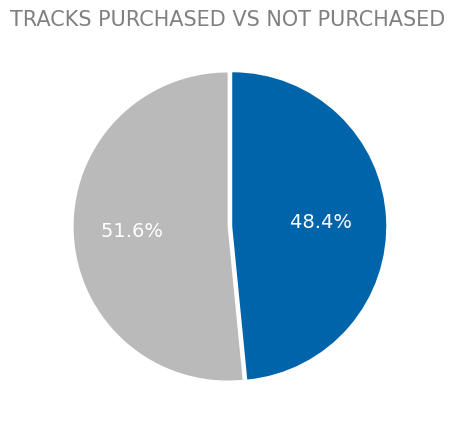

In [13]:
plt.pie(purchased_list ,
        explode = (0,0.03), 
        startangle = 90,
        autopct = '%1.1f%% ',
        textprops ={'fontsize': 14 , 'color': 'white'},
        colors = ('#BABABA' , '#0064AB'))

plt.title('TRACKS PURCHASED VS NOT PURCHASED', fontsize = 15 , color = 'grey')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()


# Observation

The pie chart from my database analysis on Chinook presents a nearly even distribution between purchased and not purchased tracks, with a small majority of tracks being purchased (51.6%). This suggests that while over half of the music tracks offered by Chinook have been sold, a considerable portion (48.4%) remains unsold. Such a distribution prompts further investigation into the causes behind the lackluster performance of a significant part of the inventory. It may be beneficial to examine customer purchasing patterns, the genres of unsold tracks, or possibly the marketing efforts to determine how to better align Chinook's offerings with its customers' preferences. Additionally, this could be an opportunity to explore promotional strategies to increase the sales of the currently unsold tracks.

In [14]:
q = '''
SELECT ar.name AS artist_name,
       g.name AS genre,
       COUNT(il.track_id)  units_sold
FROM track t
LEFT JOIN invoice_line il ON il.track_id = t.track_id
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
INNER JOIN genre AS g ON g.genre_id = t.genre_id
GROUP BY artist_name
HAVING units_sold = 0
ORDER BY units_sold;
'''
run_query(q)

,artist_name,genre,units_sold
0,Aaron Copland & London Symphony Orchestra,Classical,0
1,Academy of St. Martin in the Fields Chamber En...,Classical,0
2,"Academy of St. Martin in the Fields, John Birc...",Classical,0
3,"Academy of St. Martin in the Fields, Sir Nevil...",Classical,0
4,Adrian Leaper & Doreen de Feis,Classical,0
...,...,...,...
69,The Office,TV Shows,0
70,The Tea Party,Alternative & Punk,0
71,Ton Koopman,Classical,0
72,Toquinho & Vinícius,Bossa Nova,0


# Observations 
74 artist have not sold any units, with most of these tracks belonging to be classical music genre.

Half of the company's inventory reamains unsold, potentially trying up working capital witout genretiong returns.

Depending on the payment arrangement with record labels, there are two scenarios to consider:

If chinook pays a fixed fee to host these tracks.It might be wise to focus on more popular genres and discontinue signing less sucessfull artist.
If chinook pays the record labels based on sales percentage,there is little downside to keeping the tracks in the store
Regardless of the scenario, chinook should explore ways to promote these low-selling artist.Suggestions could be intergrated into the purchasing process or displayed on the website's cart page to increase exposure

# Albums vs Indivisual Tracks

In [15]:
q = '''
WITH invoice_data AS
    ( 
    SELECT invoice_id , MIN(track_id)track_id
    FROM invoice_line
    GROUP BY 1
    ),

Album_purchased AS
(
    SELECT invoice_id , 
    CASE
        When
        (  
            SELECT t2.track_id
            FROM track t1
            JOIN track t2
            ON
            t1.album_id = t2.album_id
            WHERE t1.track_id = invd.track_id
            
            EXCEPT
            
            SELECT il.track_id
            FROM invoice_line il
            WHERE il.invoice_id = invd.invoice_id
            
        )IS NULL
        
        AND 
        ( 
          SELECT il.track_id
          FROM invoice_line il
          WHERE il.invoice_id  = invd.invoice_id
          
          EXCEPT
          
          SELECT t2.track_id
          FROM track t1
          JOIN track t2
          ON
          t1.album_id = t2.album_id
          WHERE t1.track_id = invd.track_id
          
        )IS NULL
        
        then 'YES'
        ELSE  'NO'
        END AS Purchased_Album
        FROM invoice_data invd
        
)

SELECT Purchased_Album,
       COUNT(invoice_id) AS no_of_invoices,
       CAST(COUNT(invoice_id)AS float)*100/
       (SELECT COUNT(*)FROM Album_Purchased)AS percent
FROM Album_Purchased
GROUP BY 1
 '''
run_query(q)

,Purchased_Album,no_of_invoices,percent
0,NO,500,81.433225
1,YES,114,18.566775


# Result

Out of the total invoices recorded, 81.43% or 500 invoices were for transactions where no album was purchased. In contrast, 18.57% or 114 invoices were for transactions that included an album purchase. This data suggests that individual track purchases or other items are more common than album purchases among the invoices sampled.

# Conclusion

The analysis indicates a predominant customer preference for purchasing single items, with only 18.57% of invoices including album purchases. This suggests that customers are more selective and possibly only interested in specific tracks rather than entire albums.

# Recommendation:

Based on these findings, the following strategies could be beneficial:

### Tailor Inventory to Demand: 
Shift focus towards stocking and promoting individual tracks which are more popular among customers, possibly reducing the inventory of less popular albums.

### Modify Pricing Strategies: 
Explore pricing strategies that might incentivize album purchases, such as discounts, bundling with popular singles, or offering limited-time album exclusives.

### Enhance Discoverability of Tracks: 
Improve the discoverability of individual tracks with features like playlists, recommendations, and highlighted new releases to cater to the trend of single-item purchases.

### Customer Insights: 
Engage with customers through surveys or data analytics to understand why they may prefer individual tracks over albums, and use this information to tailor the product offerings.

### Expand Product Mix: 
Consider expanding the range of products to include more than music, such as merchandise or special edition releases, to create additional revenue streams.

By aligning business strategies with these customer purchasing habits, the company can better meet market demand and potentially increase sales and customer satisfaction.
Recommendation
